## Prosper Loan Dataset Analysis

### - By Amazing-Grace Umoren

#### Introduction

> The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

#### Note
Most of the analysis in this notebook is centered toward the customer and only few towards the bank itself



### Data Wrangling

In [2]:
#import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#load dataset

data = pd.read_csv("prosperLoanData.csv")
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
data.shape

(113937, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#data description
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
#data 
sum(data.duplicated())

0

### Data Cleaning

In [8]:
#convert all date columns to datetime

# col = ["ListingCreationDate", "ClosedDate","LoanOriginationDate"]

# for i in col:
#     data[i] = pd.to_datetime(data[i], format='%d/%m/%Y')

In [9]:
data.ProsperPaymentsLessThanOneMonthLate.unique()

array([nan,  0.,  1.,  3.,  4.,  9.,  7.,  2.,  5., 17.,  6., 14., 20.,
        8., 11., 12., 15., 10., 27., 13., 24., 35., 18., 30., 19., 42.,
       16., 21., 22., 26., 34., 23., 29., 25., 36., 28., 32., 40., 33.,
       41., 39., 31.])

### Data Exploration

#### Univriate Exploartion

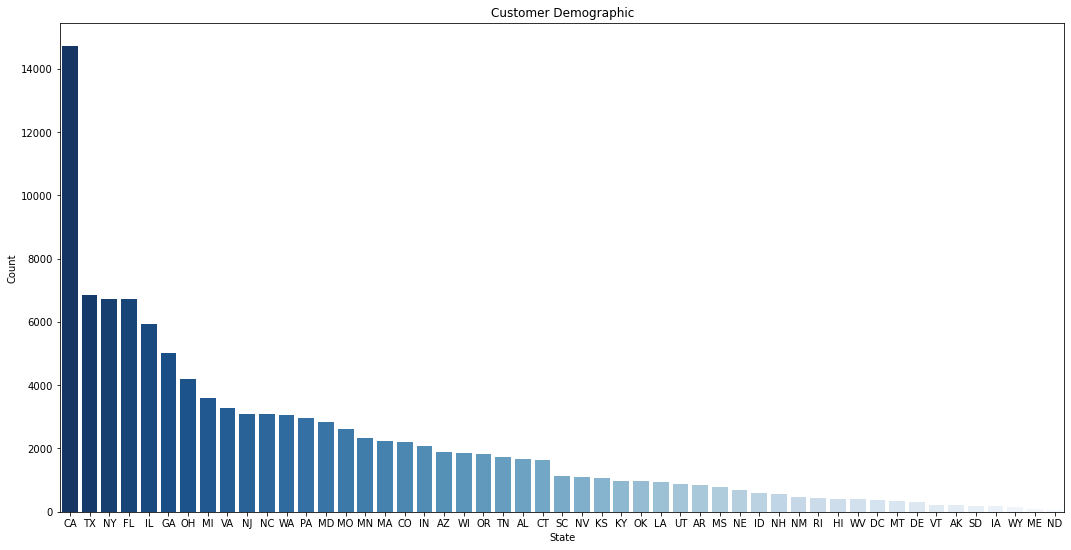

In [10]:
#Explore customer Demographics
plt.figure(figsize=(18,9))
sns.countplot(x='BorrowerState', data=data, palette='Blues_r' ,order=data['BorrowerState'].value_counts().index)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Customer Demographic");

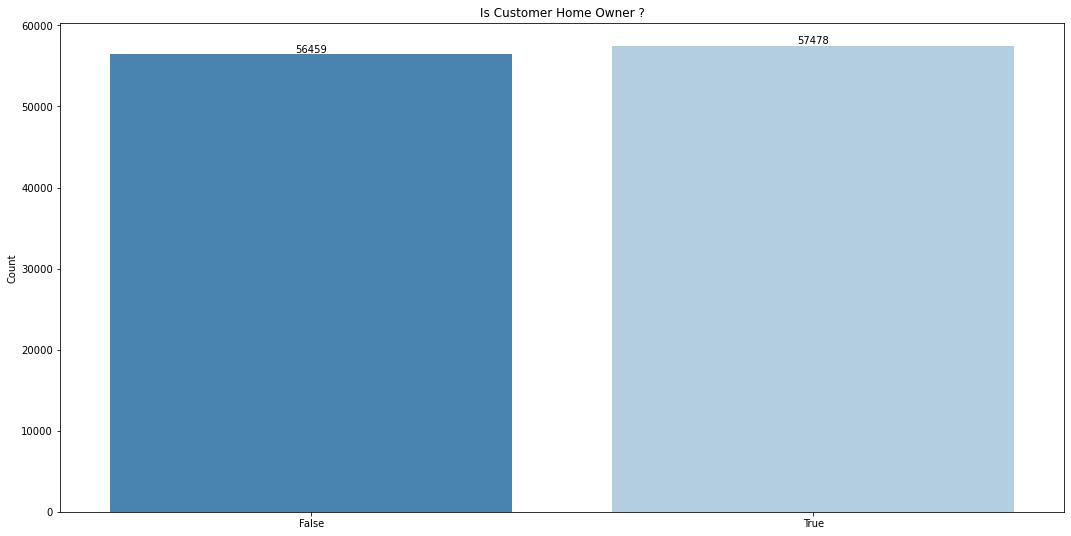

In [11]:
#Explore how many home owners there are


plt.figure(figsize=(18,9))
ax = sns.countplot(x='IsBorrowerHomeowner', data=data, palette='Blues_r')
for container in ax.containers:
            ax.bar_label(container)


plt.xlabel("")
plt.ylabel("Count")
plt.title("Is Customer Home Owner ?");

##### Income Range

In [12]:
#Customers Income range

data.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [13]:
data.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [14]:
#clean the Income Range column and change Not employed to $0 and Not displayed to NaN

data.IncomeRange.replace({'Not employed':'$0','Not displayed':np.nan}, inplace=True)

In [15]:
data.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

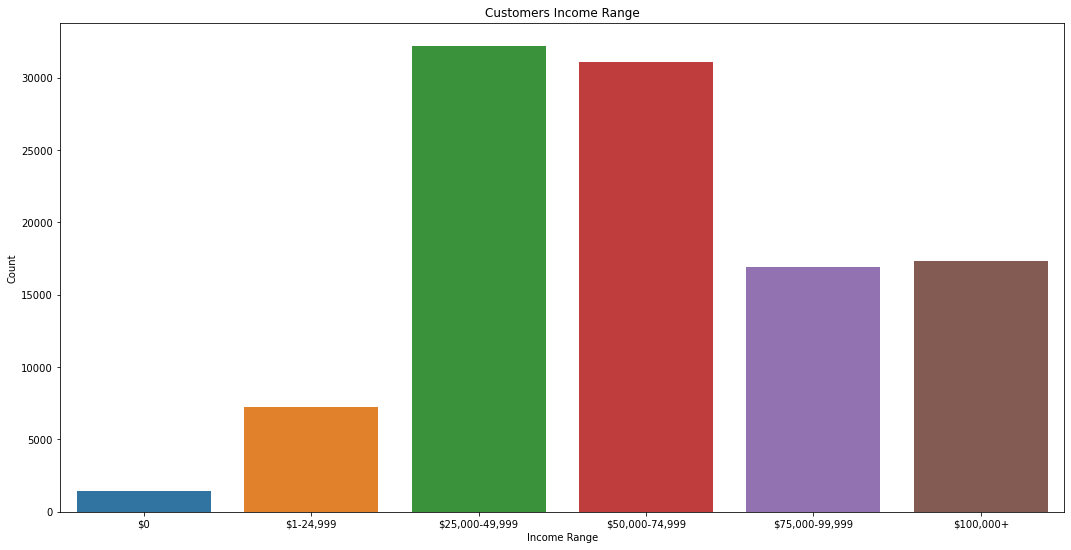

In [16]:
order = ['$0', '$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

plt.figure(figsize=(18,9))
sns.countplot(x='IncomeRange', data=data, order=order)
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Customers Income Range');

##### Occupation

In [17]:
#evaluate customers occupation
data.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [18]:
#Top 10 customers occupation
data.Occupation.value_counts().nlargest(10)

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Name: Occupation, dtype: int64

In [19]:
#Last 10 customers occupation
data.Occupation.value_counts().nsmallest(10)

Student - Technical School      16
Judge                           22
Student - Community College     28
Student - College Freshman      41
Dentist                         68
Student - College Sophomore     69
Tradesman - Plumber            102
Student - College Junior       112
Tradesman - Carpenter          120
Homemaker                      120
Name: Occupation, dtype: int64

###### Debt To Income Ratio

In [20]:
data.DebtToIncomeRatio.unique()

array([0.17   , 0.18   , 0.06   , ..., 0.3108 , 0.07419, 0.23284])

In [22]:
#round all values to 3 decimal places

data['DebtToIncomeRatio'] = np.round(data['DebtToIncomeRatio'], decimals=3)

In [24]:
data.DebtToIncomeRatio.value_counts()

0.180    4137
0.220    3687
0.170    3618
0.140    3555
0.200    3488
         ... 
1.760       1
0.112       1
0.257       1
2.670       1
0.311       1
Name: DebtToIncomeRatio, Length: 626, dtype: int64

In [25]:
data.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

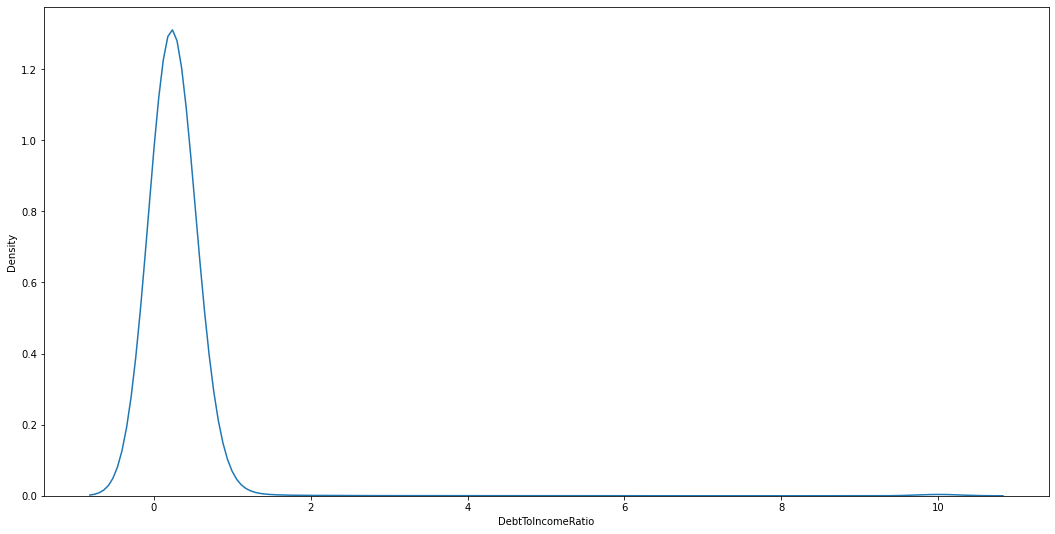

In [30]:
#visualize Debt to income ration

plt.figure(figsize=(18,9))
sns.kdeplot(data=data, x='DebtToIncomeRatio');

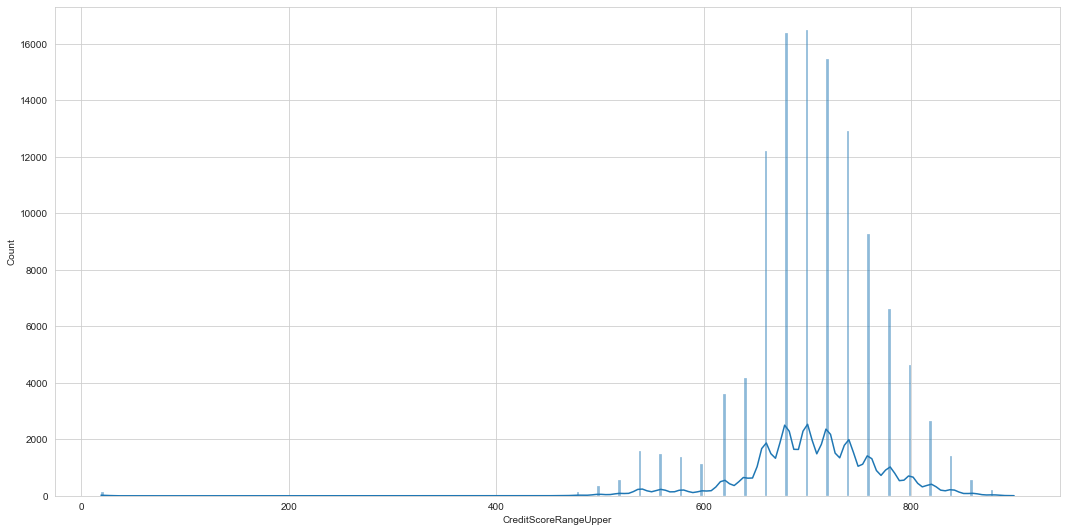

In [110]:
#credit score distribution
plt.figure(figsize=(18,9))
sns.histplot(data.CreditScoreRangeUpper, kde=True);

#### Bivariate Exploration

###### Listing Category and the amount of Loan

In [34]:
data['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [40]:
#cleaning the listing category column

#rename column
data.rename({'ListingCategory (numeric)': 'ListingCategory'}, axis = 1, inplace=True,)


In [41]:

#replace numeric values with categorical values

data['ListingCategory'] = data['ListingCategory'].replace({0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'})


data['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [47]:
#find average loan amount for each category

cat_avg = data.groupby('ListingCategory')['LoanOriginalAmount'].mean()
cat_avg = cat_avg.to_frame().reset_index()
cat_avg

,ListingCategory,LoanOriginalAmount
0,Auto,5000.647356
1,Baby&Adoption,9751.396985
2,Boat,8734.117647
3,Business,8926.859229
4,Cosmetic Procedure,5683.516484
5,Debt Consolidation,9908.352147
6,Engagement Ring,7636.944700
7,Green Loans,8456.576271
8,Home Improvement,8092.084757
9,Household Expenses,5285.486974


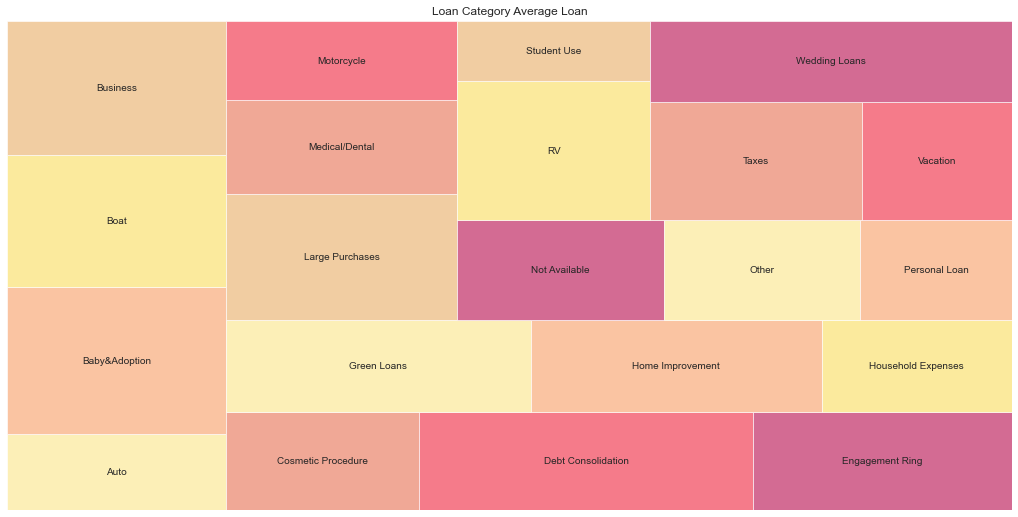

In [53]:
#create a tree map of each category average loan
import squarify

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= cat_avg['LoanOriginalAmount']# proportions of the categories
label= cat_avg['ListingCategory']

plt.figure(figsize=(18,9))

squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Loan Category Average Loan')
plt.axis('off')
plt.show()

##### States and Loan Amount

In [54]:
#What state has the highest loan amount

state_avg = data.groupby('BorrowerState')['LoanOriginalAmount'].mean()
state_avg = state_avg.to_frame().reset_index()
state_avg

,BorrowerState,LoanOriginalAmount
0,AK,9311.805000
1,AL,7555.955926
2,AR,7696.898246
3,AZ,8199.756444
4,CA,8974.325814
5,CO,8598.823529
6,CT,9129.649662
7,DC,10125.751309
8,DE,8840.586667
9,FL,8207.460565


<AxesSubplot:xlabel='BorrowerState', ylabel='LoanOriginalAmount'>

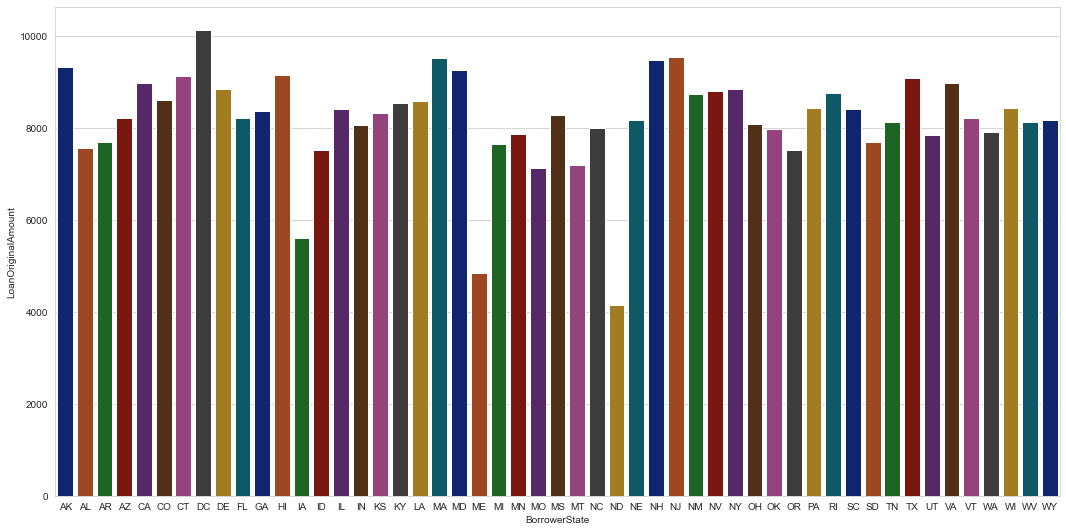

In [61]:
plt.figure(figsize=(18,9))
sns.barplot(y='LoanOriginalAmount', x='BorrowerState', data=state_avg , palette='dark');

##### Relationship between Prosper Score and Debit to Income ratio

In [63]:
data.ProsperScore.unique()

array([nan,  7.,  9.,  4., 10.,  2., 11.,  8.,  5.,  3.,  6.,  1.])

In [64]:
#prosper score maximum value is 11, clean column
data.ProsperScore.replace({11:10}, inplace=True)


In [65]:
data.ProsperScore.unique()

array([nan,  7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  6.,  1.])

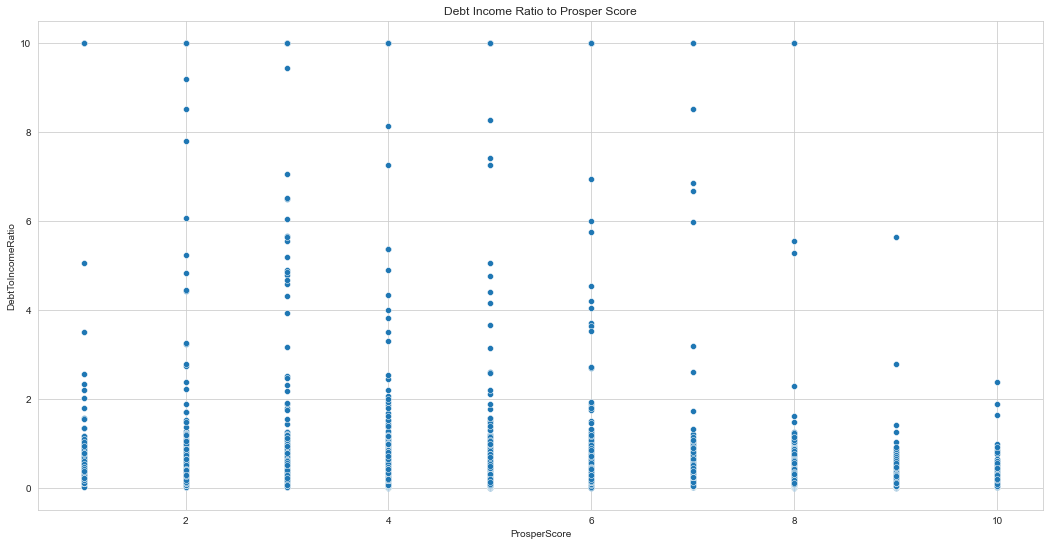

In [71]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='ProsperScore', y='DebtToIncomeRatio', data=data)
plt.title("Debt Income Ratio to Prosper Score");

In [82]:
data[['ProsperScore', 'DebtToIncomeRatio']].corr()

,ProsperScore,DebtToIncomeRatio
ProsperScore,1.000000,-0.146064
DebtToIncomeRatio,-0.146064,1.000000


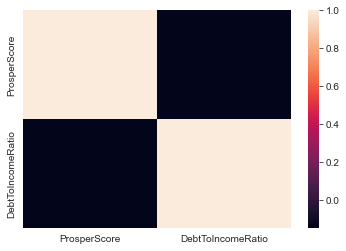

In [83]:
sns.heatmap(data[['ProsperScore', 'DebtToIncomeRatio']].corr());

###### Realtionship between Prosper Rating and Prosper Score

In [85]:
data['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [88]:
data.groupby('ProsperRating (Alpha)')['ProsperScore'].mean()

ProsperRating (Alpha)
A     7.985362
AA    9.357036
B     6.756370
C     5.466449
D     4.924128
E     3.694844
HR    3.595242
Name: ProsperScore, dtype: float64

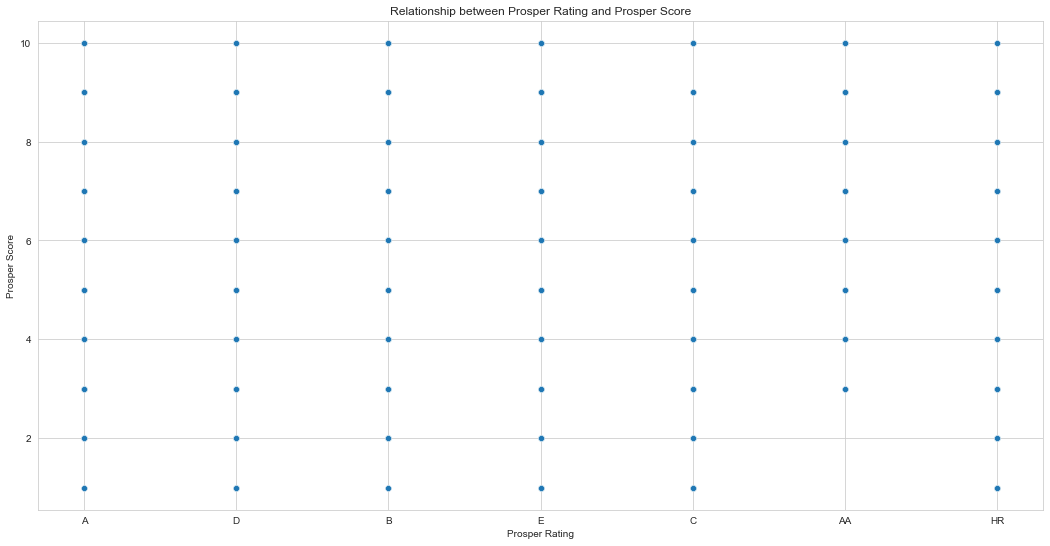

In [95]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='ProsperRating (Alpha)', y='ProsperScore', data=data)
plt.title("Relationship between Prosper Rating and Prosper Score")
plt.xlabel("Prosper Rating")
plt.ylabel("Prosper Score");

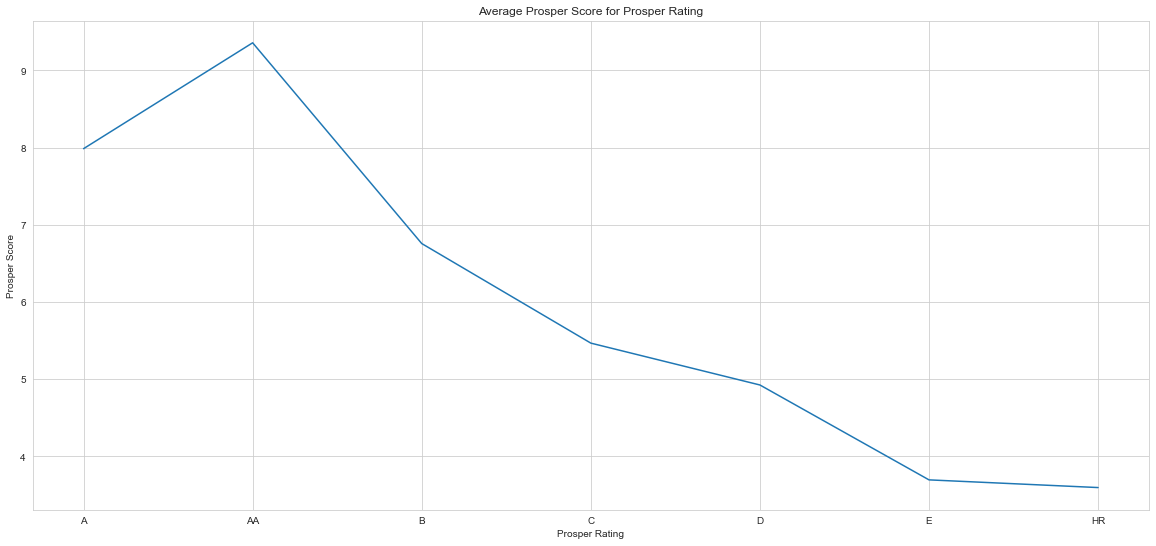

In [153]:
data.groupby('ProsperRating (Alpha)')['ProsperScore'].mean().plot()
plt.title("Average Prosper Score for Prosper Rating")
plt.rcParams["figure.figsize"] = ((20,9))
plt.xlabel("Prosper Rating")
plt.ylabel("Prosper Score");

##### Credit Score and Credit Line

In [96]:
data.CreditScoreRangeLower.unique()

array([640., 680., 480., 800., 740., 700., 820., 760., 660., 620., 720.,
       520., 780., 600., 580., 540., 560., 500., 840., 860.,  nan, 460.,
         0., 880., 440., 420., 360.])

In [97]:
data[['CreditScoreRangeLower', 'CreditScoreRangeUpper']]

,CreditScoreRangeLower,CreditScoreRangeUpper
0,640.0,659.0
1,680.0,699.0
2,480.0,499.0
3,800.0,819.0
4,680.0,699.0
...,...,...
113932,700.0,719.0
113933,700.0,719.0
113934,700.0,719.0
113935,680.0,699.0


In [128]:
#Create a new column: CreditScore

data["CreditScore"] = data.CreditScoreRangeLower.astype('str') + "-" + data.CreditScoreRangeUpper.astype('str')
data.CreditScore.astype('str')

0         640.0-659.0
1         680.0-699.0
2         480.0-499.0
3         800.0-819.0
4         680.0-699.0
             ...     
113932    700.0-719.0
113933    700.0-719.0
113934    700.0-719.0
113935    680.0-699.0
113936    680.0-699.0
Name: CreditScore, Length: 113937, dtype: object

In [142]:
data["CreditScore"].value_counts()

680.0-699.0    16492
660.0-679.0    16366
700.0-719.0    15471
720.0-739.0    12923
640.0-659.0    12199
740.0-759.0     9267
760.0-779.0     6606
780.0-799.0     4624
620.0-639.0     4172
600.0-619.0     3602
800.0-819.0     2644
520.0-539.0     1593
540.0-559.0     1474
820.0-839.0     1409
560.0-579.0     1357
580.0-599.0     1125
nan-nan          591
840.0-859.0      567
500.0-519.0      554
480.0-499.0      346
860.0-879.0      212
460.0-479.0      141
0.0-19.0         133
440.0-459.0       36
880.0-899.0       27
420.0-439.0        5
360.0-379.0        1
Name: CreditScore, dtype: int64

In [134]:
score_credit_line = data.groupby('CreditScore')['CurrentCreditLines'].count()
score_credit_line.to_frame().reset_index()

,CreditScore,CurrentCreditLines
0,0.0-19.0,0
1,360.0-379.0,0
2,420.0-439.0,0
3,440.0-459.0,0
4,460.0-479.0,0
5,480.0-499.0,0
6,500.0-519.0,0
7,520.0-539.0,1151
8,540.0-559.0,738
9,560.0-579.0,998


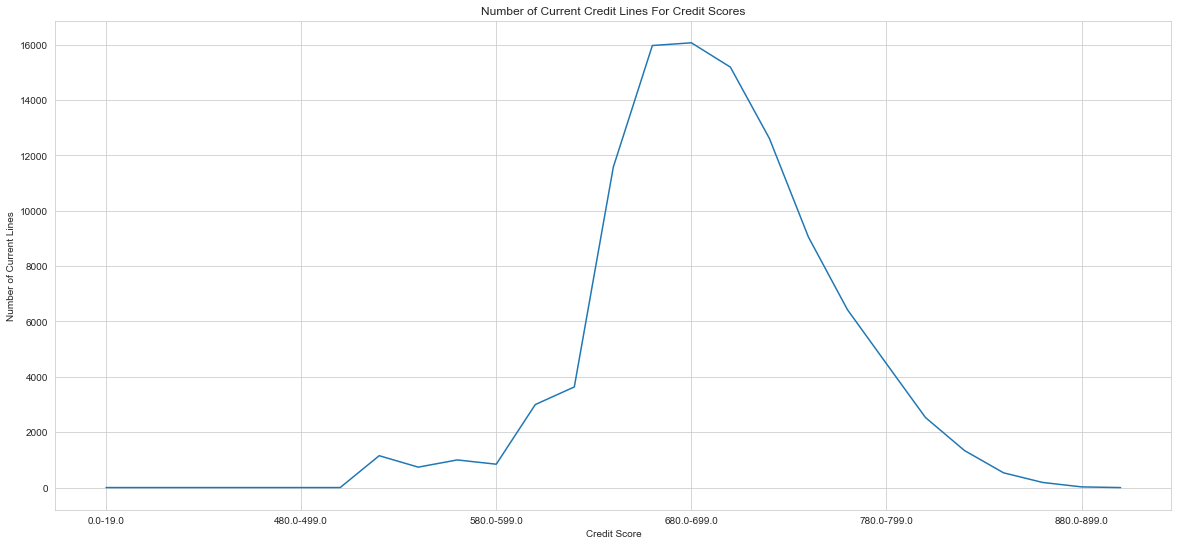

In [152]:
#sns.barplot(x='CreditScore', y='CurrentCreditLines', data=score_credit_line)

score_credit_line.plot()
plt.rcParams["figure.figsize"] = ((20,9))
plt.title("Number of Current Credit Lines For Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Number of Current Lines")
plt.show()

##### Borrowers Rate vs Loan Amount

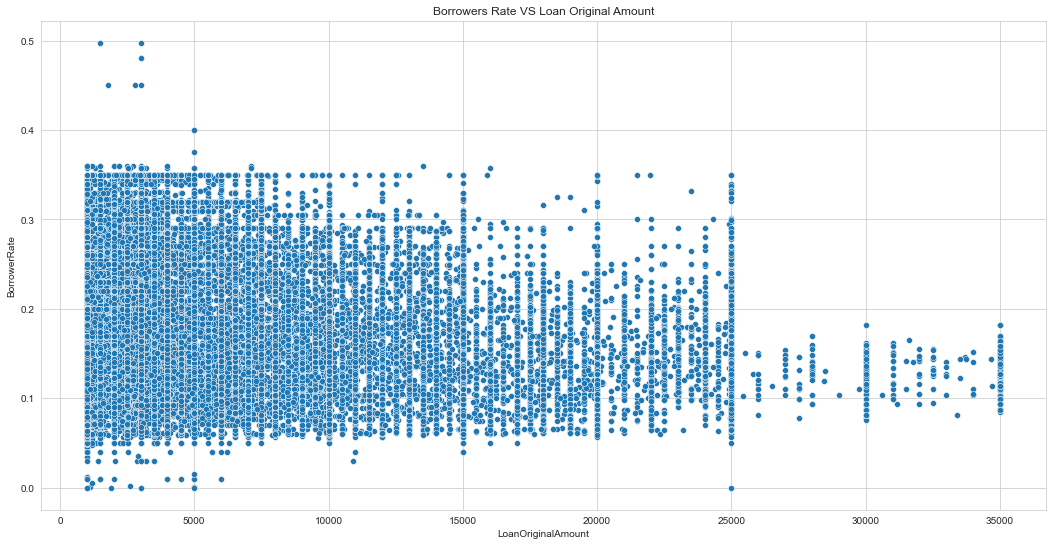

In [160]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='LoanOriginalAmount', y='BorrowerRate', data=data)
plt.title("Borrowers Rate VS Loan Original Amount");

### Multivariate Exploration

In [ ]:
sns.stripplot(x = "LoanOriginalAmount", y="BorrowerRate", hue="ProsperRating (Alpha)", data=data)